<a href="https://colab.research.google.com/github/DannyNguyen24-Vietnam/Artificial-Intelligence-Course-A-better-visualization-approach---Week-03/blob/main/ARIN_Course_03_BetterApproach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Requirements:**

**=========================================================================**\
In this part, a better approach on visualizing data with Pandas is presented\
**=========================================================================**

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Data from Website
file_url = 'http://winterolympicsmedals.com/medals.csv'
medaldata = pd.read_csv(file_url)

In [3]:
# Visualization of the first ten values
medaldata.head(10)

,Year,City,Sport,Discipline,NOC,Event,Event gender,Medal
0,1924,Chamonix,Skating,Figure skating,AUT,individual,M,Silver
1,1924,Chamonix,Skating,Figure skating,AUT,individual,W,Gold
2,1924,Chamonix,Skating,Figure skating,AUT,pairs,X,Gold
3,1924,Chamonix,Bobsleigh,Bobsleigh,BEL,four-man,M,Bronze
4,1924,Chamonix,Ice Hockey,Ice Hockey,CAN,ice hockey,M,Gold
5,1924,Chamonix,Biathlon,Biathlon,FIN,military patrol,M,Silver
6,1924,Chamonix,Skating,Figure skating,FIN,pairs,X,Silver
7,1924,Chamonix,Skating,Speed skating,FIN,10000m,M,Gold
8,1924,Chamonix,Skating,Speed skating,FIN,10000m,M,Silver
9,1924,Chamonix,Skating,Speed skating,FIN,1500m,M,Gold


**Uniqueness of Data in Each Category**

In [4]:
print('Years: \n', medaldata['Year'].unique())
print('\n============================================\n')
print('Country Codes: \n', medaldata['NOC'].unique())
print('\n============================================\n')
print('Sport types:\n', medaldata['Sport'].unique())
print('\n============================================\n')
print('Discipline types:\n', medaldata['Discipline'].unique())
print('\n============================================\n')
print('Event types:\n', medaldata['Event'].unique())
print('\n============================================\n')
print('Genders:\n', medaldata['Event gender'].unique())
print('\n============================================\n')
print('Prizes:\n', medaldata['Medal'].unique())

Years: 
 [1924 1928 1932 1936 1948 1952 1956 1960 1964 1968 1972 1976 1980 1984
 1988 1992 1994 1998 2002 2006]


Country Codes: 
 ['AUT' 'BEL' 'CAN' 'FIN' 'FRA' 'GBR' 'NOR' 'SUI' 'SWE' 'USA' 'GER' 'TCH'
 'HUN' 'ITA' 'FRG' 'NED' 'EUA' 'JPN' 'POL' 'URS' 'PRK' 'GDR' 'ROU' 'ESP'
 'LIE' 'BUL' 'YUG' 'CHN' 'EUN' 'KOR' 'LUX' 'NZL' 'AUS' 'BLR' 'KAZ' 'RUS'
 'SLO' 'UKR' 'UZB' 'CZE' 'DEN' 'CRO' 'EST' 'LAT' 'SVK']


Sport types:
 ['Skating' 'Bobsleigh' 'Ice Hockey' 'Biathlon' 'Skiing' 'Curling' 'Luge']


Discipline types:
 ['Figure skating' 'Bobsleigh' 'Ice Hockey' 'Biathlon' 'Speed skating'
 'Cross Country S' 'Curling' 'Nordic Combined' 'Ski Jumping' 'Skeleton'
 'Alpine Skiing' 'Luge' 'Short Track S.' 'Freestyle Ski.' 'Snowboard']


Event types:
 ['individual' 'pairs' 'four-man' 'ice hockey' 'military patrol' '10000m'
 '1500m' '5000m' '500m' 'combined (4 events)' '18km' 'curling' '50km'
 'K90 individual (70m)' 'five-man' 'two-man' '4x10km relay'
 'alpine combined' 'downhill' 'slalom' 'giant slalo

**Data Mining With Pandas**

In [6]:
# Prizes Information with Dataframe.info()
medaldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2311 entries, 0 to 2310
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          2311 non-null   int64 
 1   City          2311 non-null   object
 2   Sport         2311 non-null   object
 3   Discipline    2311 non-null   object
 4   NOC           2311 non-null   object
 5   Event         2311 non-null   object
 6   Event gender  2311 non-null   object
 7   Medal         2311 non-null   object
dtypes: int64(1), object(7)
memory usage: 144.6+ KB


As shown above, there are 2311 instances without any missing data in each category

In [15]:
# The categories and their amount of attribute 'Year'
medaldata['Year'].value_counts()

2006    252
2002    234
1998    205
1994    183
1992    171
1988    138
1984    117
1980    115
1976    111
1968    106
1972    105
1964    103
1960     81
1956     72
1948     68
1952     67
1936     51
1924     49
1932     42
1928     41
Name: Year, dtype: int64

In [16]:
# The categories and their amount of attribute 'Sport'
medaldata['Sport'].value_counts()

Skiing        1060
Skating        758
Biathlon       162
Bobsleigh      133
Luge           108
Ice Hockey      69
Curling         21
Name: Sport, dtype: int64

The categories of 'Year' are numerical, and the categories of 'Sport', in particular, and the others, in general, are text attribute ('object' type values). Although they are different in type of attribute, but they are countable categories thanks to the data file is in form of a CSV file

**Using Pandas to Count the Amount of Attributes with Constrains**

In [101]:
### This function counts the number of specified gender competitors of a particular country through years ###
#     Paramters: Data Frame: dataframe
#                Category for x-axis: string catx
#                Category for y-axis: string caty
#                Conditional category for the bar graph: string cond-cat
#                Conditional value for category y: string caty_val
#                Bar graph width: string  bar_width
#                Bar graph color: string  bar_color
#                Figure Width   : float   fig_w
#                Figure Height  : float   fig_h
#                Show or Not to : boolean show_bool
#     Outputs: List of years, List of Amount of Attributes Each Year

def bar_creator(dataframe, catx, caty, cond_cat, caty_val, cond_val, bar_width, bar_color, fig_w, fig_h, show_bool):

  # From data frame to array to list
  catx_lst    = list(medaldata[catx].unique())
  catx_strlst = [0]*len(catx_lst)
  caty_attr   = [0]*len(catx_lst)

  # Counting the value of category y
  for x in catx_lst:
    index_val = catx_lst.index(x)
    num_val = medaldata[(medaldata[catx] == x)&(medaldata[caty] == caty_val)&(medaldata[cond_cat] == cond_val)].count()[caty]
    caty_attr[index_val] = num_val

  # Create a string version of category x list
  if type(catx_lst[0]) != str:
    for x in catx_lst:
      index_val = catx_lst.index(x)
      catx_strlst[index_val] = str(x)

  # Bar graph creating
    # Labels and Title
  title_str = "The '{cy}' category respect to the '{cx}' category of {cond}"
  title_str = title_str.format(cy = caty, cx = catx, cond = cond_val)

  xlab = "The category '{cx}'"
  ylab = "The category '{cy}'"
  xlab = xlab.format(cx = catx)
  ylab = ylab.format(cy = caty)

  plt.rcParams["figure.figsize"] =(fig_w, fig_h)

  # Plotting Flow
  if(show_bool == True):
      # If the category x is a text category
    if catx_strlst[0] == 0:

      # Display its attributes
      plt.bar(catx_lst, caty_attr, width = bar_width, color = bar_color)
      plt.title(title_str)
      plt.xlabel(xlab)
      plt.ylabel(ylab)
      plt.show()

    else:

      # Else, display its string-converted attributes
      plt.bar(catx_strlst, caty_attr, width = bar_width, color = bar_color)
      plt.title(title_str)
      plt.xlabel(xlab)
      plt.ylabel(ylab)
      plt.show()
  
  else:
    return catx_lst, caty_attr

  # Return computed value
  return catx_lst, caty_attr

**== Some Tests ==**\
This bar graph shows the number of female competitors of Japan through out years

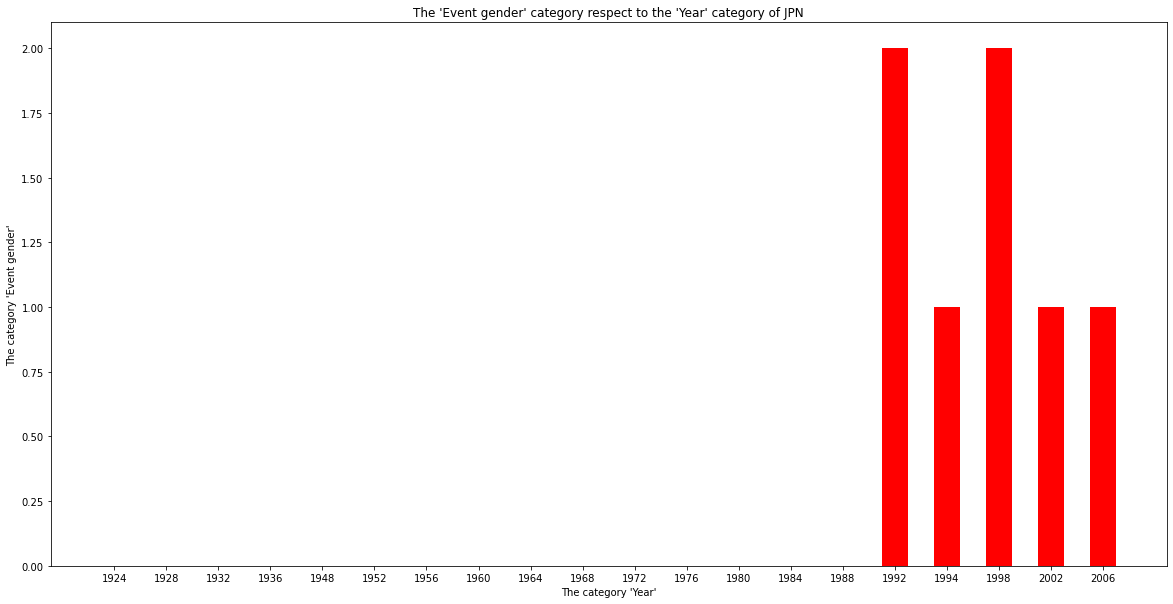

In [102]:
year_lst, female_attr = bar_creator(medaldata, 'Year', 'Event gender', 'NOC', 'W', 'JPN', 0.5, 'red', 20, 10, True)

This bar graph shows the number of male competitors of each country in 1968

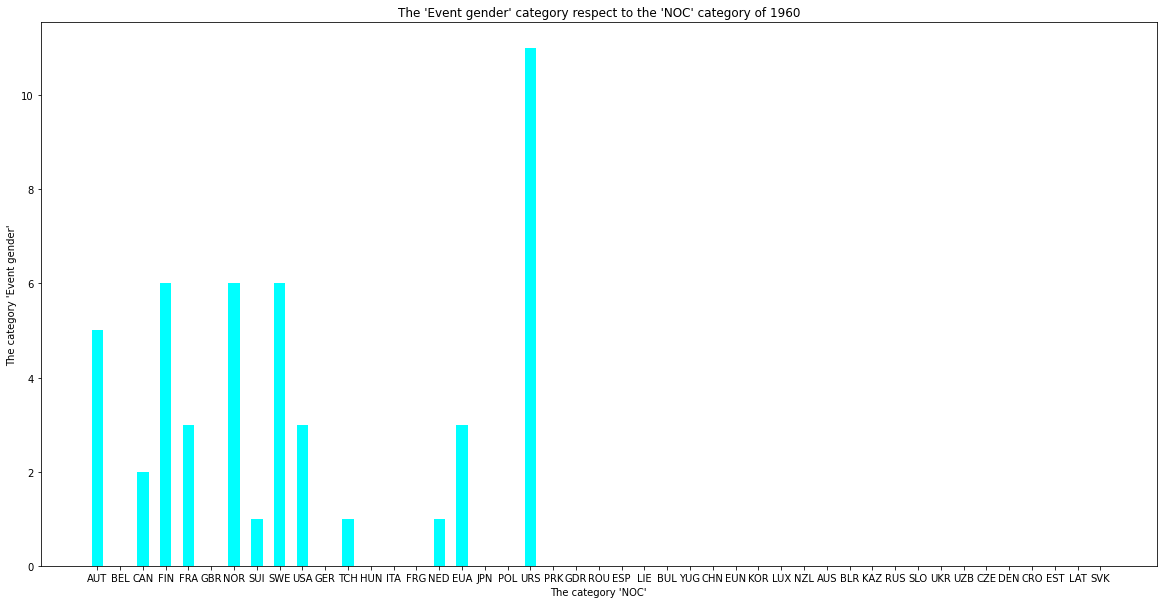

In [103]:
year_lst, male_attr = bar_creator(medaldata, 'NOC', 'Event gender', 'Year', 'M', 1960, 0.5, 'cyan', 20, 10, True)

This bar graph shows the number of male competitors of USA through out years

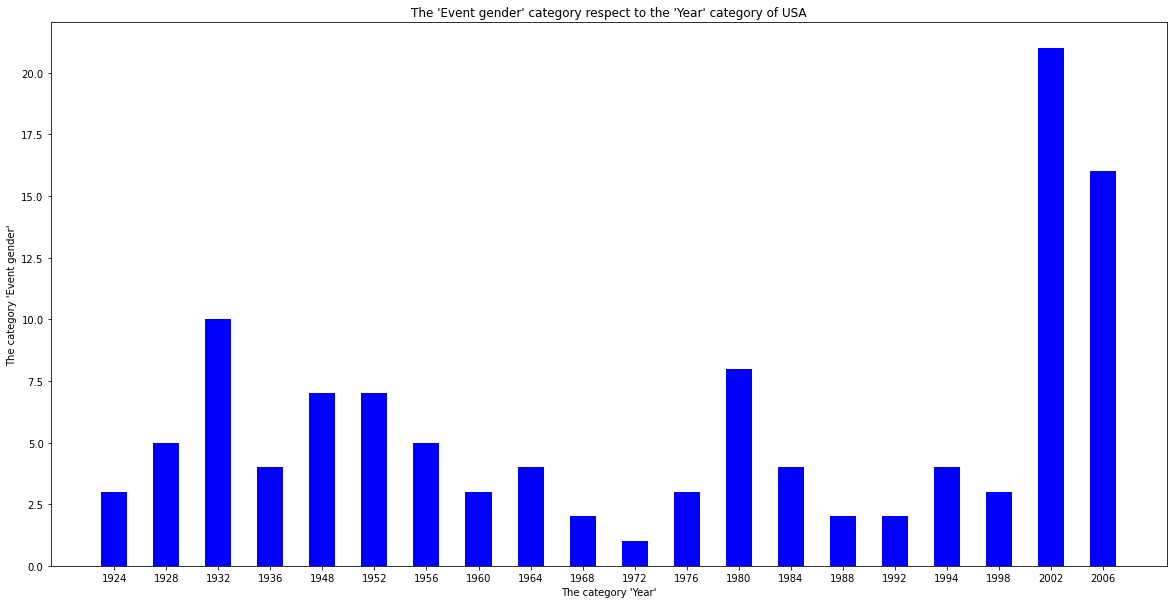

In [104]:
year_lst, male_attr = bar_creator(medaldata, 'Year', 'Event gender', 'NOC', 'M', 'USA', 0.5, 'blue', 20, 10, True)

This graph shows the amount of Gold Medals of Finnland Through Years

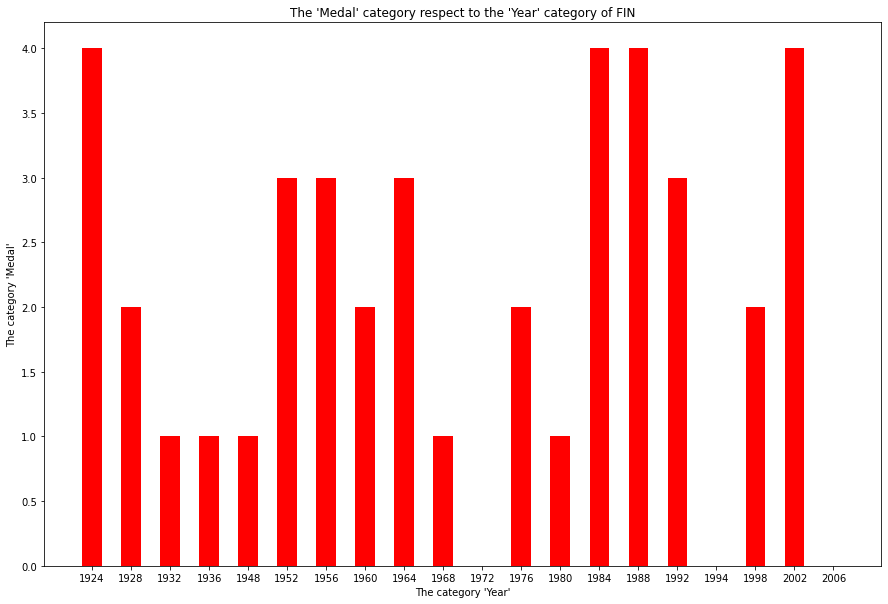

In [120]:
year_lst, golden_attr = bar_creator(medaldata, 'Year', 'Medal', 'NOC', 'Gold', 'FIN', 0.5, 'red', 15, 10, True)